In [3]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.5, rc={'figure.figsize':(12, 6)})

# for custom notebook formatting.
from IPython.core.display import HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))
HTML(open('../custom.css').read())

<br><br><br>

## Natural Language Processing
### :::: Representing Words ::::

<br><br><br><br><br><br>


<br><br>


Consider text classification tasks like spam detection or sentiment classification.

<br>

"Get free money" $\mapsto$ **spam**

"Would you like to give a talk in my class tomorrow?" $\mapsto$ **not spam**

<br><br>


How to represent a document?

<br>

Simple but historically common way: **Bag-of-Words**



"Get free money" $\mapsto$ $[0, 0, 0, \ldots, 0, 1, 0, \ldots, 0, 1, 0, \ldots, 0, 1, 0, \ldots, 0]$

- A vector whose length is equal to the number of unique words the model knows about (**vocabulary**)

- All zeros, except for 1s for words present in document

  - e.g., position $i$ corresponds to "get", $j$ corresponds to "free", etc.


<br>

#### What are all the reasons this is a terrible representation of a document?



<br><br><br><br>

This representation ignores any similarity between related words.

<br>

"Receive a million dollars" $\Leftrightarrow$ "Get free money"
- These vectors have zero overlap


<br><br>


There has been a revolution over the past 5-10 years in NLP in the way we represent words.


<br><br>

<u>Main assumption</u>: words that appear in similar contexts have similar semantics or syntactic functions.

E.g., what are the most probable words $p(w_i \mid \mathrm{"I\: feel\: so"})$?

<br><br><br><br>


 - happy
 - glad
 - **sad**
 - tired
 - hungry
 - bored
 
<br><br>
How do we formalize this?


<u> Idea:</u> represent each word as a vector of real values
- Words with similar vectors should be similar

E.g., 

- happy: $[-1.2, 3.6, 5.7, -1]$
- glad:  &nbsp;&nbsp; $[-1.1, 3.5, 5.6, -0.9]$ 

How do we assign these values?

<br><br><br>

## Predicting the next word in a sentence

$$p(w_i \mid w_{i-1} \ldots w_{i-n})$$

Predict word $w_i$ given as "features" the prior $n$ words.


This is a classification task:

- class labels: all possible words in the vocabulary (multi-class classification)
- features: the words that appear around word $w_i$


<br><br>

Free training data! Just crawl the web...

<br><br>

The idea is to "learn" the vector representation of each word that is optimized to predict the next word in a sentence.

## Learning word vectors with neural networks



<img src="figs/nn.png" width=70%/>

- Word vectors become hidden nodes in a neural network.
- An additional hidden layer allows non-linear transformations of word vectors
- Training the model to optimize $p(w_i \mid v_{i-1} \ldots v_{i-n})$ results in "useful" vectors for $v$.
- **Word representations are useful if they help us predict the next word in a sentence.**







<br><br>


### Pretrained embeddings

There are many open-source word embeddings that have been pretrained on terabytes of data.

In [25]:
# download Google's pretrained word2vec vectors ~1 Gb
# also available here: https://drive.google.com/u/0/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
import gensim
import gensim.downloader as api
w2v = api.load('word2vec-google-news-300')
# word2vec = torch.FloatTensor(weights.vectors)

In [167]:
w2v['happy']

array([-5.18798828e-04,  1.60156250e-01,  1.60980225e-03,  2.53906250e-02,
        9.91210938e-02, -8.59375000e-02,  3.24218750e-01, -2.17285156e-02,
        1.34765625e-01,  1.10351562e-01, -1.04980469e-01, -2.90527344e-02,
       -2.38037109e-02, -4.02832031e-02, -3.68652344e-02,  2.32421875e-01,
        3.20312500e-01,  1.01074219e-01,  5.83496094e-02, -2.91824341e-04,
       -3.29589844e-02,  2.11914062e-01,  4.32128906e-02, -8.59375000e-02,
        2.81250000e-01, -1.78222656e-02,  3.79943848e-03, -1.71875000e-01,
        2.06054688e-01, -1.85546875e-01,  3.73535156e-02, -1.21459961e-02,
        2.04101562e-01, -3.80859375e-02,  3.61328125e-02, -8.15429688e-02,
        8.44726562e-02,  9.37500000e-02,  1.44531250e-01,  7.42187500e-02,
        2.51953125e-01, -7.91015625e-02,  8.69140625e-02,  1.58691406e-02,
        1.09375000e-01, -2.23632812e-01, -5.15747070e-03,  1.68945312e-01,
       -1.36718750e-01, -2.51464844e-02, -3.85742188e-02, -1.33056641e-02,
        1.38671875e-01,  

In [168]:
len(w2v.vocab)

3000000

In [169]:
w2v['glad'][:20]

array([-0.04272461,  0.21582031, -0.02661133,  0.09130859,  0.19433594,
        0.03039551,  0.2734375 , -0.09179688,  0.08935547,  0.18554688,
        0.03027344, -0.19921875, -0.05786133, -0.13867188,  0.01068115,
        0.04345703,  0.24316406,  0.07519531,  0.02868652, -0.04516602],
      dtype=float32)

In [170]:
w2v['happy'][:20]

array([-5.1879883e-04,  1.6015625e-01,  1.6098022e-03,  2.5390625e-02,
        9.9121094e-02, -8.5937500e-02,  3.2421875e-01, -2.1728516e-02,
        1.3476562e-01,  1.1035156e-01, -1.0498047e-01, -2.9052734e-02,
       -2.3803711e-02, -4.0283203e-02, -3.6865234e-02,  2.3242188e-01,
        3.2031250e-01,  1.0107422e-01,  5.8349609e-02, -2.9182434e-04],
      dtype=float32)

In [171]:
 w2v.distance("happy", "glad")

0.25911086797714233

In [175]:
 w2v.distance("happy", "sad")

0.46453857421875

In [173]:
w2v.distance('love', 'school')

0.9043338373303413

In [183]:
w2v.most_similar(positive=['disengagement'])

[('Gaza_disengagement', 0.7822480797767639),
 ('Disengagement_Plan', 0.7762269973754883),
 ('Disengagement', 0.7700093388557434),
 ('unilateral_disengagement', 0.741513192653656),
 ('Sharon_disengagement', 0.7411800622940063),
 ('unilateral_withdrawal', 0.7365983128547668),
 ('Gaza_pullout', 0.7151823043823242),
 ('Ariel_Sharon_disengagement', 0.6754516959190369),
 ('Gaza_Disengagement', 0.6504416465759277),
 ('Prime_Minister_Ariel_Sharon', 0.6465588808059692)]


<br>

How do these models work?


Let's start with a somewhat simpler model:

<img src="figs/smallnn.png" width=50%/>


Given an input word, predict what other word appears nearby.


<br>

## Debugging neural nets

- Once we start designing our own networks, it is very easy to make a mistake.


- It is helpful to start with a small, easy dataset where we know what the network should do.


- If we don't get near perfect accuracy on such data, then something is wrong with our implementation.

<br>

Here, we'll learn word embeddings for an artificially easy task:

Two words appear near each other iff they start with the same letter:

> "All aardvarks ate apples."

> "Both bobcats broke bottles." 

We will generate a dataset of **word pairs** $(w_1, w_2)$ indicating that $w_1$ occurrs near $w_2$.

<br><br><br>

In [184]:
animals = ['aardvark', 'albatross', 'alligator', 'alpaca', 'anole', 'ant', 'anteater', 'antelope', 'ape', 'armadillo',
           'baboon', 'badger', 'barracuda', 'bat', 'bear', 'bee', 'bison', 'boar', 'bobcat', 'butterfly']
vocab = {w: i for i,w in enumerate(animals)}
a_names = [a for a in animals if a[0] == 'a']
b_names = [b for b in animals if b[0] == 'b']


def make_animal_data():
    np.random.seed(42)
    animal_data = pd.DataFrame(zip(np.random.choice(a_names, size=300), np.random.choice(a_names, size=300)),
                              columns=['w1', 'w2'])
    animal_data = pd.concat((animal_data,
                           pd.DataFrame(zip(np.random.choice(b_names, size=300), np.random.choice(b_names, size=300)),
                              columns=['w1', 'w2'])))
    animal_data = animal_data.sample(frac=1, random_state=42)
    # remove where w1==w2
    animal_data = animal_data[animal_data.w1 != animal_data.w2]#.drop_duplicates()
    return animal_data
data = make_animal_data()
data

,w1,w2
110,aardvark,ant
119,bat,bear
265,bee,butterfly
77,ape,albatross
181,anole,armadillo
...,...,...
121,armadillo,aardvark
20,anole,ant
71,anole,ant
270,alpaca,albatross


<img src="figs/smallnn.png" width=50%/>

## PyTorch

Great open-source library from Facebook that makes it easy to train neural nets.

<br><br>

Creating a network consists of a few steps:

1. Create a Python class that subclasses `torch.nn.Module`.
2. In the constructor, define the structure of the network (layers, activation functions)
3. Implement a method called `forward` that computes the forward pass of the neural net. This applies each transformation defined in the constructor in the approriate order and produces an output.
4. Write a method to generate batches of training data.
5. Pick an optimizer to learn the weights of the model.

Let's walk through how the above model is implemented in PyTorch.

<br><br>

In [45]:
import torch
import torch.nn as nn
import math

class WordPairModel(nn.Module):
    def __init__(self, vocab_size, embedding_size, verbose=True):
        super(WordPairModel, self).__init__()
        self.verbose = verbose
        # input -> hidden
        # linear == x*A^T + b =~ dense neural net layer
        self.embedding = nn.Linear(vocab_size, embedding_size, bias=False)
        # embedding -> scores for each word
        self.hidden = nn.Linear(embedding_size, vocab_size, bias=False)
        # normalize scores to be probabilities
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, input):
        # input is one-hot encoding, like [0,0,0,1,0,0]
        # embedding is embedded version of input word, like [-.2, 3.6]
        embedding = self.embedding(input)
        # hidden is the scores for possible output words, unnormalized
        hidden = self.hidden(embedding)
        # output is the normalized version of hidden (all numbers between 0 and 1 and sum to 1)
        output = self.softmax(hidden)
        
        if self.verbose:
            print('input\n', input)
            print('embedding\n', embedding)
            print('hidden\n', hidden)
            print('softmax\n', output)
        return output

- `nn.Linear`: $x A^T + b$
- **embedding**:
  - Input: one-hot encoded word vector $w_1 \in \mathbb{R}^V$. e.g. $<0,1,0 \ldots 0>$
  - Output: word embedding
  -  model parameters $A \in \mathbb{R}^{V x H}$
    - $V$: vocabulary size
    - $H$: embedding size
    
- **hidden**:
  - Input: embedding vector $h \in \mathbb{R}^H$. e.g. $<.22,-.01,.3 \ldots 1.2>$
  - Output: scores for each possible word in the vocabulary
  - model parameters $A \in \mathbb{R}^{H x V}$


- **softmax**

$$
\hbox{softmax}(x) = \frac{e^x}{\sum_i e^{x_i}}
$$
- normalize scores in previous step to get a distribution over possible next words
- exponentiate: make things positive
- normalize so it sums to one for all possible outputs.
- How many $x_i$ are there in our model?

<br><br>

Next, we have to convert all of our word pairs into appropriate **tensor** data structures.

In [185]:
def vectorize_one(word, vocabulary):
    """ one-hot encoding"""
    tensor = torch.zeros(1, len(vocabulary))
    tensor[0][vocabulary[word]] = 1.0
    return tensor

def vectorize_batch(rows, vocabulary):
    """
    encode all examples in given list of rows in DataFrame.
    """
    return (torch.cat([vectorize_one(w, vocabulary) for w in rows.w1]),
            torch.cat([vectorize_one(w, vocabulary) for w in rows.w2]))
    
vectorize_one('aardvark', vocab)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])

In [186]:
# Compute forward pass for first example.
# Note the weights are randomly initialized.
model = WordPairModel(len(vocab), embedding_size=2)
output = model(vectorize_batch(data.iloc[:1], vocab)[0])

input
 tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])
embedding
 tensor([[-0.1942, -0.1974]], grad_fn=<MmBackward>)
hidden
 tensor([[-0.0290, -0.0901,  0.0362,  0.0334, -0.0121,  0.1497,  0.2174,  0.1260,
         -0.0171,  0.0851,  0.0450,  0.1623, -0.0621,  0.1836,  0.1509,  0.0136,
          0.0778, -0.0056, -0.0857,  0.0245]], grad_fn=<MmBackward>)
softmax
 tensor([[0.0460, 0.0433, 0.0491, 0.0490, 0.0468, 0.0550, 0.0589, 0.0537, 0.0466,
         0.0516, 0.0495, 0.0557, 0.0445, 0.0569, 0.0551, 0.0480, 0.0512, 0.0471,
         0.0435, 0.0485]], grad_fn=<SoftmaxBackward>)


In [191]:
# look at the embedding weights
model.embedding.weight

Parameter containing:
tensor([[-0.1942, -0.1141,  0.1964,  0.1579,  0.0353, -0.1432, -0.0230, -0.1931,
          0.1758,  0.0566,  0.0032, -0.0362, -0.0259,  0.1320,  0.0186,  0.0640,
         -0.1888, -0.1939, -0.1204,  0.1636],
        [-0.1974,  0.1617, -0.1381, -0.0121,  0.0703,  0.2213, -0.2127,  0.0686,
         -0.1162,  0.2182,  0.1176,  0.0615,  0.1861, -0.0906, -0.0663, -0.1614,
         -0.1947,  0.1778, -0.0349,  0.1999]], requires_grad=True)

In [192]:
# .forward() does the following:
i = vectorize_batch(data.iloc[:1], vocab)[0]
print('i:', i)
e = i.mul(model.embedding.weight).sum(dim=1)
print('embedding:', e)
h = e.mul(model.hidden.weight).sum(dim=1)
print('hidden:', h)
o =  h.exp() / h.exp().sum()
print('output:', o)

i: tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])
embedding: tensor([-0.1942, -0.1974], grad_fn=<SumBackward1>)
hidden: tensor([-0.0290, -0.0901,  0.0362,  0.0334, -0.0121,  0.1497,  0.2174,  0.1260,
        -0.0171,  0.0851,  0.0450,  0.1623, -0.0621,  0.1836,  0.1509,  0.0136,
         0.0778, -0.0056, -0.0857,  0.0245], grad_fn=<SumBackward1>)
output: tensor([0.0460, 0.0433, 0.0491, 0.0490, 0.0468, 0.0550, 0.0589, 0.0537, 0.0466,
        0.0516, 0.0495, 0.0557, 0.0445, 0.0569, 0.0551, 0.0480, 0.0512, 0.0471,
        0.0435, 0.0485], grad_fn=<DivBackward0>)


In [195]:
# map from output distribution to predicted word.
def output2label(output, words):
    # 0 if false is most probable prediction, 1 if true
    top_n, top_i = output.topk(1)
    return words[top_i.item()] # , math.exp(top_n)

output2label(output, animals)
animals

['aardvark',
 'albatross',
 'alligator',
 'alpaca',
 'anole',
 'ant',
 'anteater',
 'antelope',
 'ape',
 'armadillo',
 'baboon',
 'badger',
 'barracuda',
 'bat',
 'bear',
 'bee',
 'bison',
 'boar',
 'bobcat',
 'butterfly']

## How do we learn the best weights of the model?

**Gradient Descent**

- Pick an error function:
  - What probability does the model assigned to the "correct" output word?
  -  $E = \sum_i -p(w^* \mid w_i)$
  
  
- Compute the gradient of this function with respect to the model weights
  - the gradient tells us in which direction we should change the weights to reduce the error function
  

PyTorch uses **automatic differentiation** to do this without requiring us to know calculus!

100%|██████████| 40/40 [00:00<00:00, 58.05it/s]


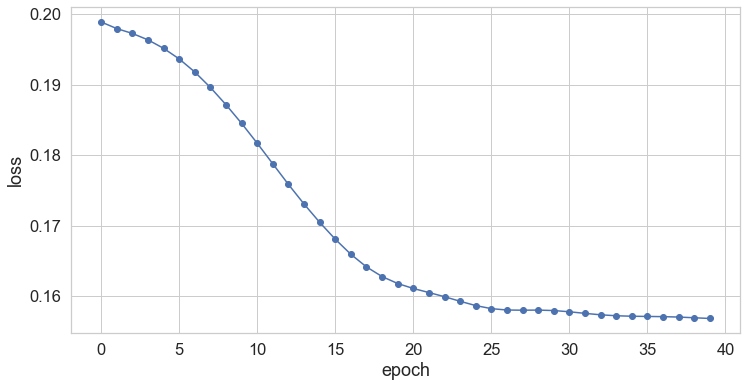

In [196]:
def train_word_pair(data, vocab):
    torch.random.manual_seed(42)  # for reproducibility
    learning_rate = 0.1
    model = WordPairModel(len(vocab), embedding_size=2)
    # binary cross entropy
    # choice of loss function depends on output type of model
    criterion = nn.BCELoss()
    # fancier version of gradient descent
    optimizer = torch.optim.Adam(model.parameters(),
                                 lr=learning_rate) 
    model.verbose = False

    loss_val = []
    num_epochs = 40
    # main training loop
    for epoch in tqdm(range(num_epochs), total=num_epochs):
        # reset all the gradient information
        optimizer.zero_grad() 
        # create training batch
        inputs, labels = vectorize_batch(data, vocab)
        # make predictions
        outputs = model(inputs)
        # compute loss
        loss = criterion(outputs, labels)
        # computes all the gradients
        loss.backward()      
        # update parameters in direction of gradient
        optimizer.step()     
        loss_val.append(loss.item())

    plt.figure()
    plt.plot(loss_val, 'bo-')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    return model

word_pair_model = train_word_pair(data, vocab)

In [197]:
# get embedding for a word
def word2embedding(word, model, vocabulary):
    return model.embedding(
        vectorize_one(word, vocabulary)).detach().cpu().numpy()[0]
word2embedding('ant', word_pair_model, vocab)

array([ 2.047941  , -0.50115424], dtype=float32)

In [198]:
word2embedding('bee', word_pair_model, vocab)

array([-2.0751474 , -0.43378177], dtype=float32)

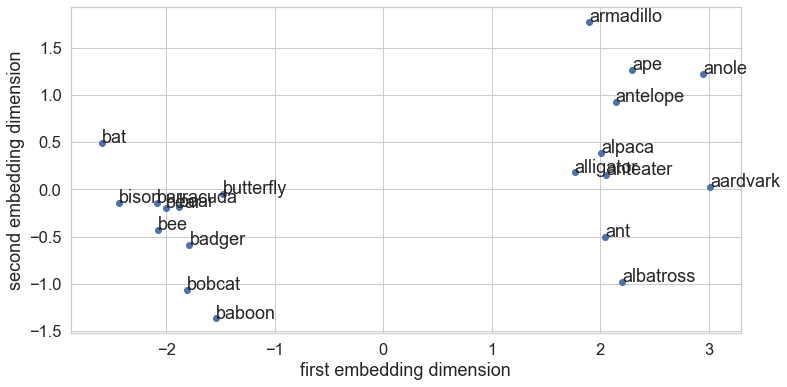

In [199]:
def plot_embeddings(animal_embeddings, animals):
    plt.figure()
    plt.scatter([e[0] for e in animal_embeddings],
                [e[1] for e in animal_embeddings])
    for animal, embed in zip(animals, animal_embeddings):
        plt.annotate(animal, (embed[0], embed[1]))
    plt.xlabel('first embedding dimension')
    plt.ylabel('second embedding dimension')
    plt.show()
    
animal_embeddings = [word2embedding(animal, word_pair_model, vocab) for animal in animals]
plot_embeddings(animal_embeddings, animals)

In [73]:
# how many parameters in our model?
print(word_pair_model)

WordPairModel(
  (embedding): Linear(in_features=20, out_features=2, bias=False)
  (hidden): Linear(in_features=2, out_features=20, bias=False)
  (softmax): Softmax(dim=1)
)


<br><br>

With enough data and time, we can train our own word embedding model.

<br><br><br>

Let's return to our pre-trained model from the start.

How can we visualize these 300-dimensional vectors? 

<br>

One option: "project" down to two dimensions

- Principal Component Analysis -- find the two dimensions that preserve the most variation in the data.

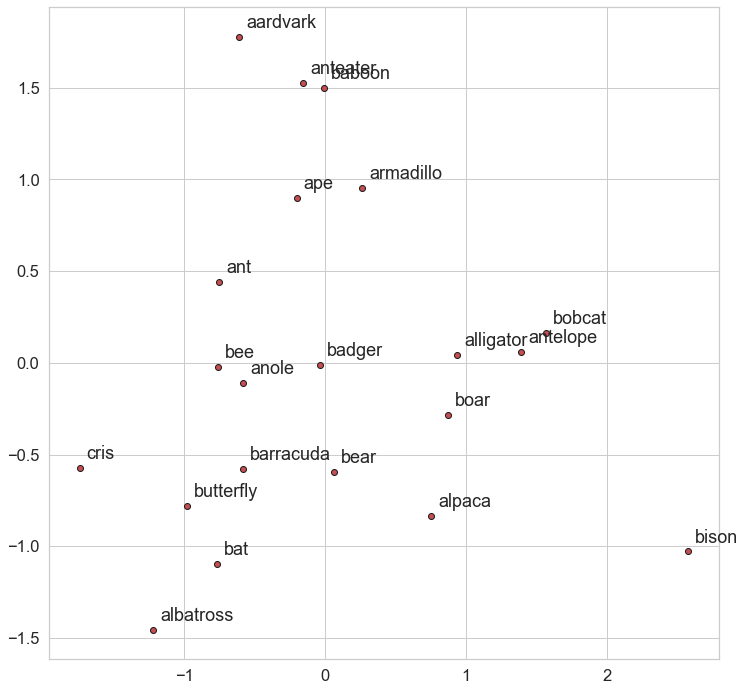

In [201]:
from sklearn.decomposition import PCA
def plot_embeddings_w2v(w2v, words):
    word_vectors = np.array([w2v[a] for a in words])
    # reduce two 2 dimensions
    twodim = PCA(random_state=42).fit_transform(word_vectors)[:,:2]
    plt.figure(figsize=(12,12))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+.05, y+.05, word)
    plt.show()
    
plot_embeddings_w2v(w2v, animals + ['cris'])

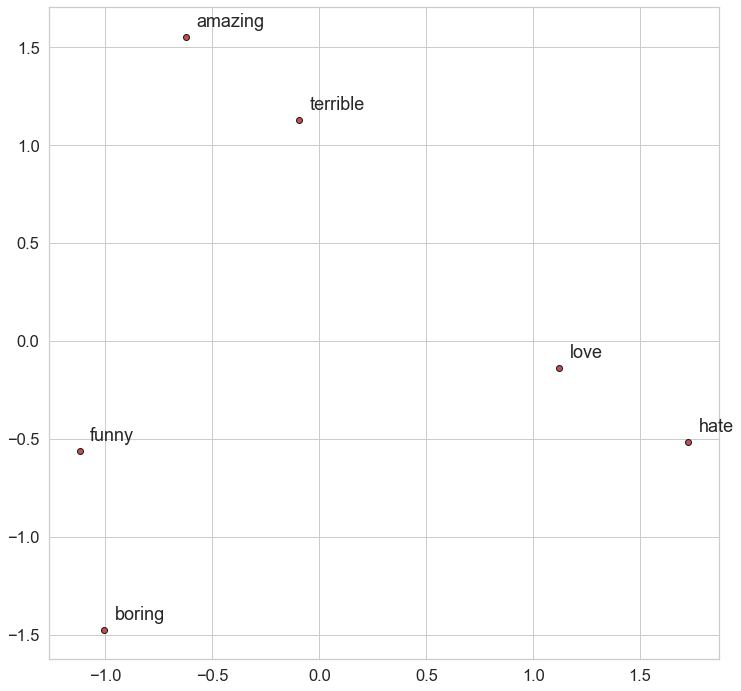

In [202]:
plot_embeddings_w2v(w2v, ['love', 'hate', 'funny', 'boring', 'amazing', 'terrible'])

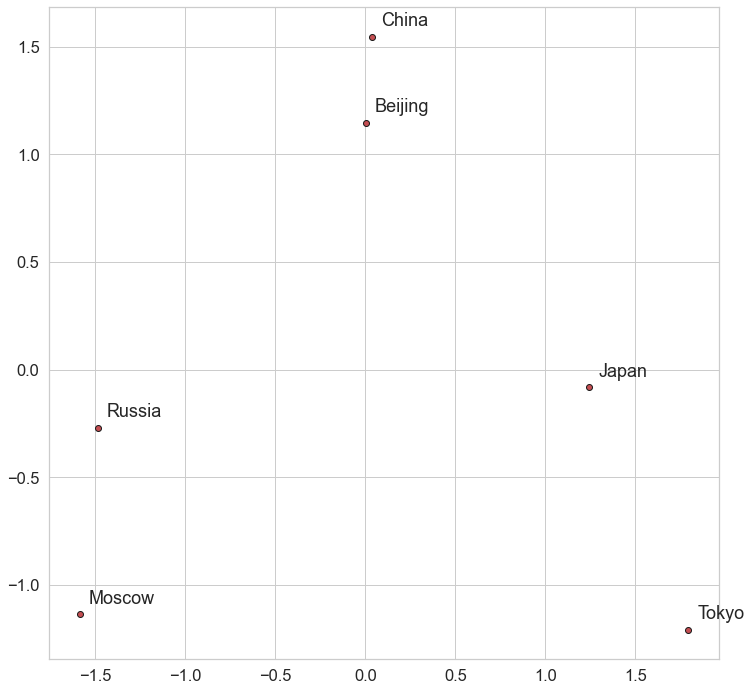

In [203]:
plot_embeddings_w2v(w2v, ['China', 'Beijing', 'Russia', 'Moscow', 'Japan', 'Tokyo'])

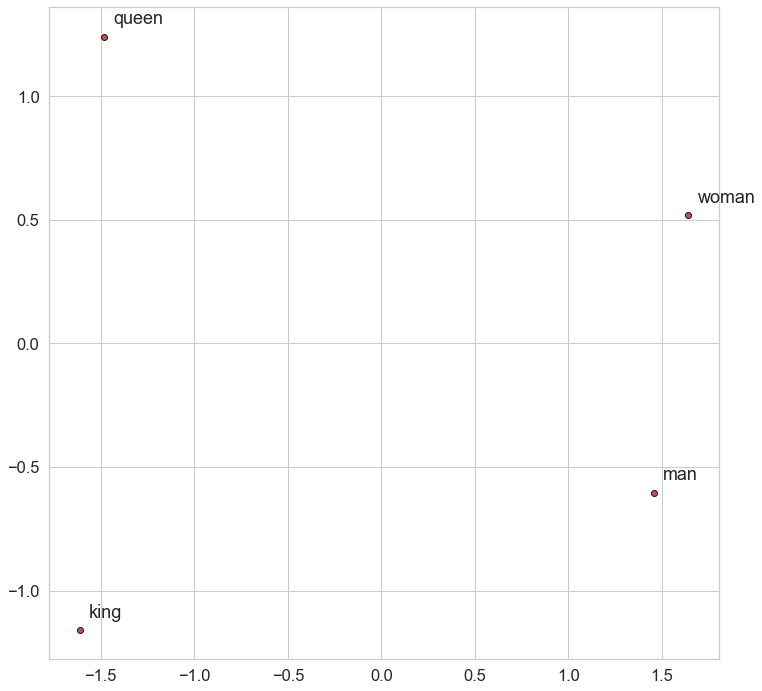

In [204]:
plot_embeddings_w2v(w2v, ['king', 'queen', 'man', 'woman'])

## analogy task

a::b c::?

woman::man  queen::king


king - man + woman =~ queen ?

In [205]:



w2v.most_similar(positive=['king', 'woman'], negative=['man'])




[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

In [206]:


queenlike = w2v['king'] - w2v['man'] + w2v['woman']
queenlike[:10]



array([ 0.04296875, -0.17822266, -0.12908936,  0.11523438,  0.00268555,
       -0.10229492,  0.19580078, -0.1795044 ,  0.01953125,  0.40991974],
      dtype=float32)

In [207]:



w2v.most_similar(positive=['father', 'woman'], negative=['man'])





[('mother', 0.8462507724761963),
 ('daughter', 0.7899606823921204),
 ('husband', 0.7560455799102783),
 ('son', 0.7279756665229797),
 ('eldest_daughter', 0.7120417952537537),
 ('niece', 0.7096832990646362),
 ('aunt', 0.6960804462432861),
 ('grandmother', 0.6897341012954712),
 ('sister', 0.6895190477371216),
 ('daughters', 0.6731119751930237)]

In [208]:








w2v.most_similar(positive=['computer_programmer', 'woman'], negative=['man'])

[('homemaker', 0.5627118945121765),
 ('housewife', 0.5105047225952148),
 ('graphic_designer', 0.505180299282074),
 ('schoolteacher', 0.49794942140579224),
 ('businesswoman', 0.49348920583724976),
 ('paralegal', 0.4925510883331299),
 ('registered_nurse', 0.49079740047454834),
 ('saleswoman', 0.4881627559661865),
 ('electrical_engineer', 0.4797726571559906),
 ('mechanical_engineer', 0.4755399823188782)]

<br><br><br>

## Bias!

Models trained on data can replicate and/or amplify existing stereotypes.

<br><br><br>

<img src="figs/rec.png" width=50%/>

[source](https://spectrum.ieee.org/tech-talk/telecom/internet/women-less-likely-to-be-shown-ads-for-highpaying-jobs)
- Fairness in recommendation systems
- Experiment: create fake Google profiles, then search for jobs
- Only difference was gender
> The male profiles were much more likely to be shown ads for a career coaching service for executive positions paying over $200,000. The Google ad network showed this ad to the male users more than 1800 times, but only about 300 times to women.

## Today we have many more advanced models for learning word representations

An incredible amount of computing power has been dedicated to building larger and larger models:


e.g.,

<img src="https://www.microsoft.com/en-us/research/uploads/prod/2020/02/TurningNGL_Model__1400x788.png"/>

**missing from graph: GPT-3: 175B parameters! (June 2020)**


> Microsoft announced on September 22, 2020 that it had licensed "exclusive" use of GPT-3; others can still use the public API to receive output, but only Microsoft has control of the source code.
[Wikipedia](https://en.wikipedia.org/wiki/GPT-3)

### Word meaning depends on context

- The vase broke.
- Dawn broke.
- The news broke.
- Sandy broke the world record.
- The burglar broke into the house.
- We broke even.
- I'm broke.


So, our word representations should also depend on context.

E.g., the word vector for "broke" will depend on the sentence in which it appears


## BERT
<img src="figs/bert.png" width=60%/>

## ELMO
<img src="figs/elmo.png" width=60%/>


[source](http://jalammar.github.io/illustrated-bert/)

In [129]:
# download a pretrained BERT
# see https://huggingface.co/transformers/
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-cased')

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [130]:
unmasker("Hello I'm a [MASK] teacher.")

[{'sequence': "Hello I'm a good teacher.",
  'score': 0.13039752840995789,
  'token': 1363,
  'token_str': 'good'},
 {'sequence': "Hello I'm a math teacher.",
  'score': 0.10609082132577896,
  'token': 12523,
  'token_str': 'math'},
 {'sequence': "Hello I'm a school teacher.",
  'score': 0.09806567430496216,
  'token': 1278,
  'token_str': 'school'},
 {'sequence': "Hello I'm a history teacher.",
  'score': 0.07527903467416763,
  'token': 1607,
  'token_str': 'history'},
 {'sequence': "Hello I'm a gym teacher.",
  'score': 0.04505777731537819,
  'token': 10759,
  'token_str': 'gym'}]

In [209]:
unmasker("Southeastern is a [MASK] university.")

[{'sequence': 'Southeastern is a public university.',
  'score': 0.2195228487253189,
  'token': 1470,
  'token_str': 'public'},
 {'sequence': 'Southeastern is a private university.',
  'score': 0.21181951463222504,
  'token': 2029,
  'token_str': 'private'},
 {'sequence': 'Southeastern is a state university.',
  'score': 0.14117947220802307,
  'token': 1352,
  'token_str': 'state'},
 {'sequence': 'Southeastern is a regional university.',
  'score': 0.024616491049528122,
  'token': 2918,
  'token_str': 'regional'},
 {'sequence': 'Southeastern is a charter university.',
  'score': 0.013957852497696877,
  'token': 7394,
  'token_str': 'charter'}]

In [136]:
unmasker("Louisiana is a [MASK] state.")

[{'sequence': 'Louisiana is a sovereign state.',
  'score': 0.1993735134601593,
  'token': 14611,
  'token_str': 'sovereign'},
 {'sequence': 'Louisiana is a free state.',
  'score': 0.10907028615474701,
  'token': 1714,
  'token_str': 'free'},
 {'sequence': 'Louisiana is a separate state.',
  'score': 0.03180975094437599,
  'token': 2767,
  'token_str': 'separate'},
 {'sequence': 'Louisiana is a US state.',
  'score': 0.022728633135557175,
  'token': 1646,
  'token_str': 'US'},
 {'sequence': 'Louisiana is a model state.',
  'score': 0.02121606655418873,
  'token': 2235,
  'token_str': 'model'}]

In [143]:
# GPT2 improved upon BERT for language generation tasks.
text_generator = pipeline("text-generation",  model="gpt2")

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [163]:
text_generator("The computer science professor is", max_length=20, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "The computer science professor is one of its most popular students. He's at the very least a good"},
 {'generated_text': 'The computer science professor is also accused of using stolen passwords for her office email and password to connect to'},
 {'generated_text': 'The computer science professor is known best for his computer technology research.\n\nThe University of Texas at'},
 {'generated_text': 'The computer science professor is working on creating new AI hardware by building on some of the tools available while'},
 {'generated_text': 'The computer science professor is calling for a special "Super-computer" — similar to what NASA has'}]

In [210]:
text_generator("The students at Southeastern Louisiana University are", max_length=20, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'The students at Southeastern Louisiana University are also participating in the first ever student-only college project.'},
 {'generated_text': "The students at Southeastern Louisiana University are so confident in the school's system that they're willing to"},
 {'generated_text': 'The students at Southeastern Louisiana University are not the only ones feeling the brunt of the controversy — not'},
 {'generated_text': 'The students at Southeastern Louisiana University are studying how to build a house that\'s both "free and'},
 {'generated_text': 'The students at Southeastern Louisiana University are making new friends at the small business school.\n\nThe'}]

In [155]:
text_generator("As far as I am concerned, I will", max_length=200)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'As far as I am concerned, I will not be on my hands and knees if a black man\'s right to his liberty is lost, as he was forced to do by my mother, and that was only because my brother-in-law, who I had married and had brought her along for this purpose, had refused to take my life. He wanted to be left alone by the white man; and I will never have the privilege to say, \'No, we can\'t\'."\n\nHe began to explain that he had taken the matter up with B. S. Lewis, who had offered him an offer to join the Revolutionary League, but Lewis denied it, saying that he felt he could not ask "the white man for permission." As Ketteman observed, "Lewis had, as I have said, a very strong desire to get out." Lewis was an abolitionist, but did not support slavery when he was president. After the war, he did join the Revolutionary League.'}]

In [162]:
print(text_generator("A group of 19 lawyers, scholars, activists and journalists from around the world will announce on Wednesday whether former President Donald Trump’s Facebook account is to be reinstated or kept off the platform for good, a ruling with massive implications for U.S. politics.", max_length=200)[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


A group of 19 lawyers, scholars, activists and journalists from around the world will announce on Wednesday whether former President Donald Trump’s Facebook account is to be reinstated or kept off the platform for good, a ruling with massive implications for U.S. politics.

Trump won the presidential election in a landslide in November and has vowed to make America great again. The post, which was posted several months ago, detailed how he decided to turn it over to the Justice Department and to ensure he was not sued over it.

In response to the decision, Twitter posted some new content for it to show some of the world's most important issues that he raised during his campaign, including the Affordable Care Act and immigration reform.

Trump later took a hard line at critics of the post.

"The decision's not as big of a deal as you might think it is," Trump tweeted on Sunday.

The post came as Trump and Univision co-host Jorge Ramos


In [212]:
text_generator("Aron Culotta is", max_length=50, do_sample=False)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Aron Culotta is a writer and editor for the New York Times Magazine. He is the author of The New York Times Book of the Year, The New York Times Book of the Year, and The New York Times Book of the Year. He'}]